In [365]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [366]:
# For single match
def single_match(img, loc, w, h):
    top_left = loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    matched_img = cv2.rectangle(img, top_left, bottom_right, 0, 2)
    matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2GRAY)

    cv2.imwrite(r"output\single_matched.jpg", matched_img)

    return matched_img



In [367]:
# For multiple match
def multiple_match(img, result, w, h):
    threshold = 0.8
    loc = np.where( result >= threshold)
    for i in zip(*loc[::-1]):
        matched_img = cv2.rectangle(img, i, (i[0] + w, i[1] + h), 0, 1)
        matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2GRAY)
        
    cv2.imwrite(r"output\multiple_matched.jpg", matched_img)

    return matched_img

In [368]:
def plots(result, matched_img):
    plt.subplot(1, 2, 1)
    plt.imshow(result, cmap='gray')
    plt.title('Match Detected')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(matched_img, cmap='gray')
    plt.title('Template Matched')
    plt.xticks([])
    plt.yticks([])

In [369]:
img = cv2.imread("images\diamond_card.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_img = cv2.imread(r"images\template_card.jpg", 0)

H, W = gray_img.shape[::]
print(f"\nInput Image Width = {W} and Height = {H}")
h, w = template_img.shape[::]
print(f"\nTemplate Width = {w} and Height = {h}")

# You can use methods listed below

# methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
#            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

result = cv2.matchTemplate(gray_img, template_img, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(f"\nMax_Loc={max_loc}\nMin_Loc={min_loc}")


Input Image Width = 474 and Height = 632

Template Width = 81 and Height = 106

Max_Loc=(118, 142)
Min_Loc=(389, 286)


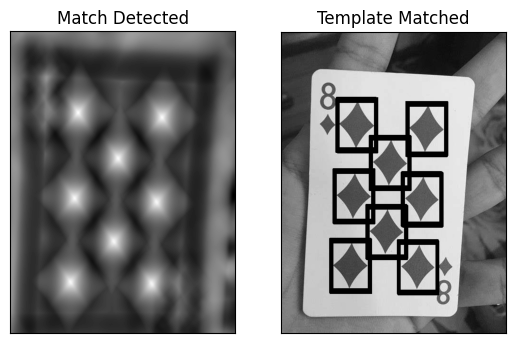

In [370]:
# match = single_match(img, max_loc, w, h)
match = multiple_match(img, result, w, h)

plots(result, match)

plt.show()
cv2.destroyAllWindows()